# Spectral Feature recognition 

Dataset: Weinberger, S. (2013). Speech accent archive. George Mason University. http://accent.gmu.edu/<p>
Retrieved from: https://www.kaggle.com/rtatman/speech-accent-archive/data

## Feature Extraction Part

Load File

In [7]:
audio_path = './speech_pattern_based_speaker_classification/sample.mp3'

In [8]:
import librosa
import numpy as np

x , sr = librosa.load(audio_path)
print(type(x), type(sr))
##x input vector, sr sample rate

C:\ProgramData\Anaconda3\lib\site-packages\librosa\core\audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


<class 'numpy.ndarray'> <class 'int'>


Control sample rate

In [5]:
librosa.load(audio_path, sr=44100)

C:\ProgramData\Anaconda3\lib\site-packages\librosa\core\audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


(array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 3.0517578e-05], dtype=float32), 44100)

Plot spectrogram

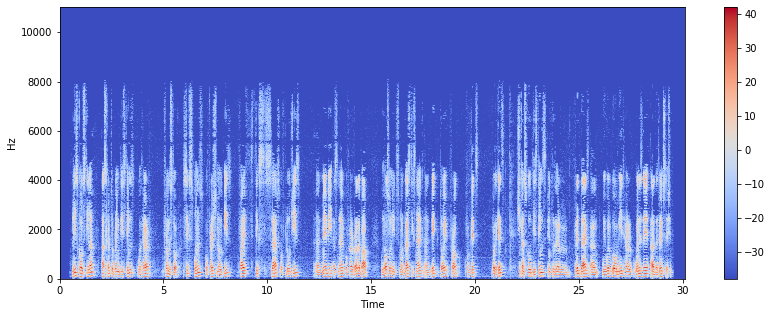

In [8]:
import matplotlib.pyplot as plt
import librosa
import librosa.display

#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

Zero Crossing Rate

C:\ProgramData\Anaconda3\lib\site-packages\librosa\core\audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


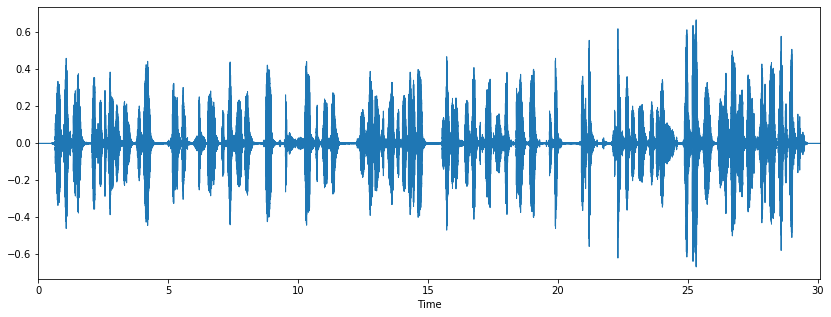

In [9]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
y, sr = librosa.load(audio_path)
#Plot the signal:
plt.figure(figsize=(14, 5))
zcr=librosa.feature.zero_crossing_rate(y) ##save zcr as zero-crossing rate for each audio
librosa.display.waveplot(y, sr=sr)

In [10]:
print(np.shape(zcr))

(1, 1296)


Spectral Centroid

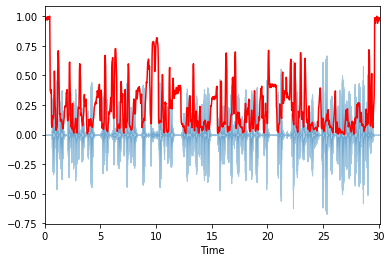

In [11]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
sc = spectral_centroids ####save sc as spectral_centroids rate for each audio
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

In [56]:
print(np.shape(sc))

(1296,)


Spectral Rolloff: Spectral rolloff is the frequency below which a specified percentage of the total spectral energy

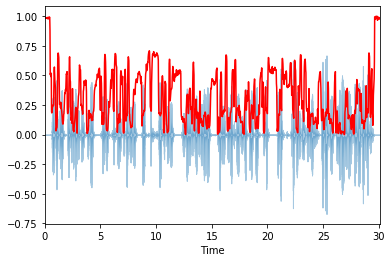

In [12]:
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]
specr = spectral_rolloff ####save specr as spectral_rolloff  for each audio
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

In [58]:
print(np.shape(specr))

(1296,)


Melspectrogram

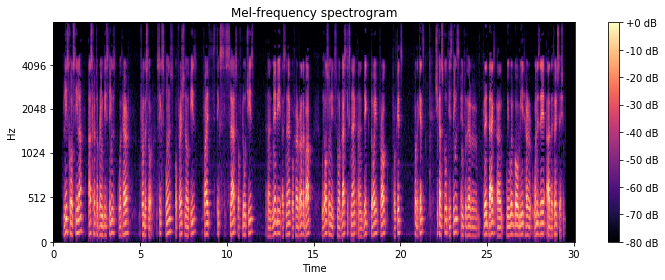

In [13]:
S=librosa.feature.melspectrogram(x, sr=sr, n_mels=128, fmax=8000) ####save S as melspectrogram for each audio
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

In [64]:
print(np.shape(S))

(128, 1296)


In [14]:
print(zcr) ##zero-crossing-rate
print(specr) ##Spectral rolloff 
print(sc) ##spectral centroid
print(S) ##melspectrogram

[[0.16357422 0.25732422 0.32763672 ... 0.32763672 0.27832031 0.18945312]]
[9302.34375    9291.57714844 9291.57714844 ... 9216.2109375  9194.67773438
 9291.57714844]
[5659.92862185 5682.91471732 5640.33780774 ... 5672.53888603 5690.33371473
 5697.24101106]
[[6.03886292e-07 6.40400629e-07 5.64235449e-07 ... 4.22330430e-07
  5.74707940e-07 5.79740060e-07]
 [2.23505547e-09 9.70178604e-09 1.44881813e-08 ... 1.94454337e-08
  7.02348579e-09 6.39491904e-10]
 [4.77650897e-09 9.53983914e-09 1.06048947e-08 ... 5.42767697e-09
  1.61856828e-09 9.85434956e-10]
 ...
 [2.29526211e-08 1.77186124e-08 1.29153630e-08 ... 1.42184815e-08
  2.26065158e-08 2.26965273e-08]
 [2.30501218e-08 1.67067213e-08 1.06571658e-08 ... 1.65804526e-08
  1.41532626e-08 1.46847512e-08]
 [8.41042702e-09 1.06700568e-08 1.48194506e-08 ... 1.65647691e-08
  2.36446809e-08 2.38121665e-08]]


## Classification part

Read the data with native language as english, spanish and mandarin.

In [2]:
import glob
import numpy as np
filefolder = './speech_pattern_based_speaker_classification/recordings/'
samplelist= sorted(glob.glob(filefolder + 'english*.mp3')) #obtain the file list

In [2]:
import glob
filefolder = './speech_pattern_based_speaker_classification/recordings/'
types = (filefolder + 'english*.mp3', filefolder + 'spanish*.mp3', filefolder + 'mandarin*.mp3') # the tuple of file types
samplelist = []
for files in types:
    samplelist.extend(glob.glob(files))

Zero Crossing Rate computation

In [70]:
zcrlist = []
import librosa
import librosa.display
for i in range(len(samplelist)):
    print(i)
    y, sr = librosa.load(samplelist[i])
    zcr=librosa.feature.zero_crossing_rate(y) ##save zcr as zero-crossing rate for each audio
    zcrlist.extend(zcr)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [96]:
print(np.shape(zcrlist))
print(np.shape(zcrlist[0]))
print(np.shape(zcrlist[1]))
print(np.shape(zcrlist[2]))
print(zcrlist)

(806,)
(942,)
(930,)
(807,)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [97]:
X = zcrlist
X = np.asarray(zcrlist)
print(np.shape(X))

(806,)


### Melspectrogram Calculation

In [3]:
Melspeclist = []
import librosa
import librosa.display
for i in range(len(samplelist)):
    print(i)
    x, sr = librosa.load(samplelist[i])
    S=librosa.feature.melspectrogram(x, sr=sr, n_mels=1, fmax=8000) ####save S as melspectrogram for each audio
    Melspeclist.extend(S)

0


C:\ProgramData\Anaconda3\lib\site-packages\librosa\core\audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1


C:\ProgramData\Anaconda3\lib\site-packages\librosa\core\audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

In [8]:
import numpy as np
print(np.shape(Melspeclist))
print(np.shape(Melspeclist[0]))
print(np.shape(Melspeclist[1]))
print(np.shape(Melspeclist[2]))
print(np.shape(Melspeclist[100]))

(870005,)
(942,)
(930,)
(807,)
(1073,)


In [6]:
X = zcrlist
X = np.asarray(zcrlist)
print(np.shape(X))

NameError: name 'zcrlist' is not defined

### Spectral centroid

In [7]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
Sclist = []
import librosa
import librosa.display
for i in range(len(samplelist)):
    print(i)
    x, sr = librosa.load(samplelist[i])
    sc = librosa.feature.spectral_centroid(x, sr=sr)[0]
    Melspeclist.extend(sc)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [7]:
b = []
for i in range(0,579):
    b.append(1)
for i in range(0,162):
    b.append(2)
for i in range(0,65):
    b.append(3)
y = np.array(b).reshape(1,806)
y = y.T

In [8]:
print(np.shape(y))

(806, 1)


In [ ]:
print(np.shape(X))
print(type(X[0]))

Split the input data into training and testing.

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [86]:
print(np.shape(X_train))

(540,)


### XGBoost

In [83]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb_c = XGBClassifier(max_depth=10, n_estimators=100, n_jobs=-1, num_class=3) 
xgb_c.fit(X_train, y_train.ravel())
y_pred = xgb_c.predict(X_test) ##predict

y_true = y_test
target_names = ['subject 1', 'subject 2', 'subject 3']
print(classification_report(y_true, y_pred, target_names=target_names))

IndexError: tuple index out of range

### Multimple Layer Perception

In [89]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=False).fit(X_train, y_train.ravel())
y_pred = clf.predict(X_test) ##predict
target_names = ['subject 1', 'subject 2', 'subject 3']

print(classification_report(y_test, y_pred, target_names=target_names))

ValueError: setting an array element with a sequence.

### Support Vector Machine

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, cv=5, iid=False) ##gridsearch to tune hyperparameter
clf = clf.fit(X_train, y_train.ravel())
y_pred = clf.predict(X_test)  ##predict

target_names = ['subject 1', 'subject 2', 'subject 3']
print(classification_report(y_test, y_pred, target_names=target_names))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: setting an array element with a sequence.